# 🐸 파이썬으로 데이터 주무르기 

## NetworkX: Network Analysis with Python

일자: 2020-07-04~ 

### 1. Introduction to NetworkX
#### network analysis

Vast amounts of network data are being generated and collected 
-  Sociology: web pages, mobile phones, social networks
-  Technology: Internet routers, vehicular flows, power grids

#### official website - [NetworkX Tutorial] 참고(https://networkx.github.io/documentation/stable/tutorial.html)

#### A basic example

1. Generate a graph using networkx
2. Draw the graph
3. Save the drawing graph

In [1]:
!pip install networkx

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
# 객체 생성 
g = nx.Graph()
# 노드 추가
g.add_edge('a','b',weight=0.1)
g.add_edge('b','c',weight=2.0)
g.add_edge('a','c',weight=5.0)
g.add_edge('c','d',weight=2.2)

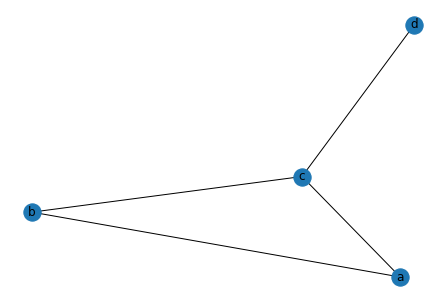

In [4]:
# 그림을 그려라! 
nx.draw(g, with_labels = True, weight=True)
# plt.savefig('exampl.png') - 이미지 저장

### 2. Getting started with Python and NetworkX

key point: nodes are points, edges are lines.

#### add nodes


In [54]:
g = nx.Graph()

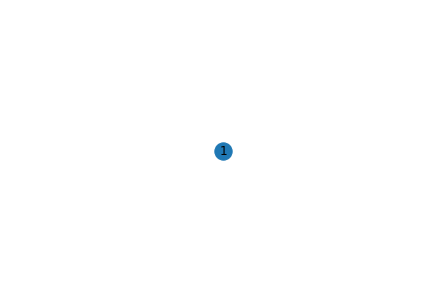

In [55]:
# one node at a time 
g.add_node(1)
nx.draw(g, with_labels = True)

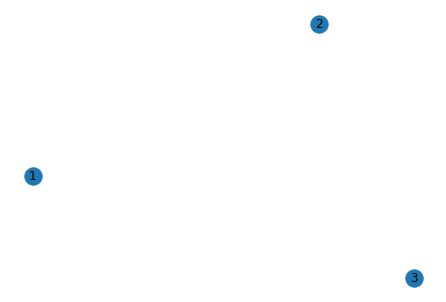

In [56]:
g.add_nodes_from([2,3])
nx.draw(g, with_labels = True)

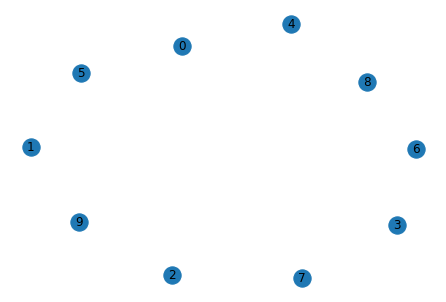

In [57]:
# A container of nodes
h = nx.path_graph(10)
g.add_nodes_from(h) # g now contains the nodes of h
nx.draw(g, with_labels = True)

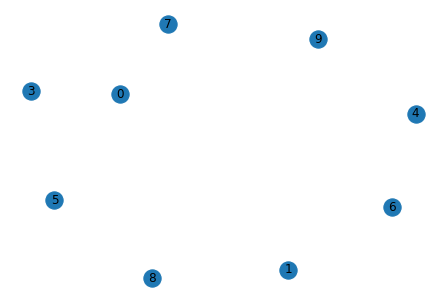

In [58]:
# In contrast, you can remove any node of the graph
g.remove_node(2)
nx.draw(g, with_labels = True) # node 2가 사라지고 9개만 남음

#### node entities

A node can be any hashable object such as strings, numbers, files, functions, and more. This provides important flexibility for all your projects.

In [59]:
import math 
g.add_node(math.cos) # 코사인
fh = open('tmp.txt','w') # 파일에다 쓰기
g.add_node(fh) # fh에 노드 그리기 
print(g.nodes())

[1, 3, 0, 4, 5, 6, 7, 8, 9, <built-in function cos>, <_io.TextIOWrapper name='tmp.txt' mode='w' encoding='UTF-8'>]


#### add edges


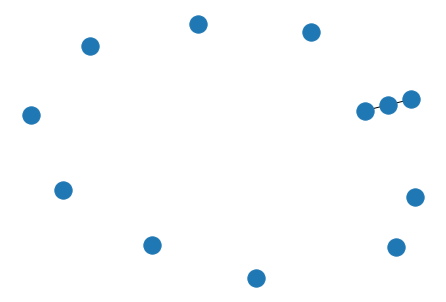

In [60]:
# single edge 
g.add_edge(1,2)
e=(2,3)
g.add_edge(*e) # unpack edge tuple
nx.draw(g)

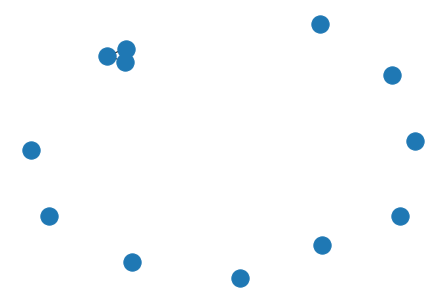

In [61]:
# list of edges 
g.add_edges_from([(1,2), (1,3)])
nx.draw(g)

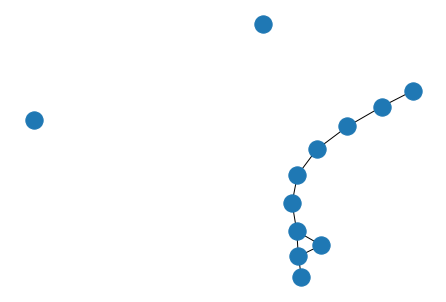

In [62]:
# container of edges 
g.add_edges_from(h.edges()) 
nx.draw(g)

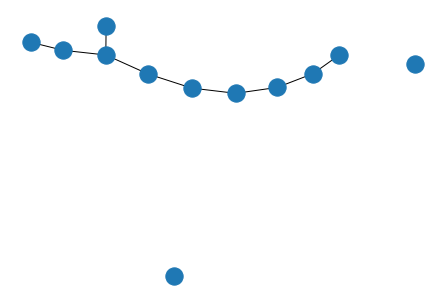

In [63]:
# In contrast, you can remove any edge of the graph
g.remove_edge(1,2)
nx.draw(g)

#### access nodes and edges

None


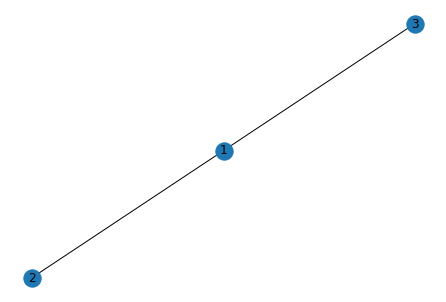

In [64]:
g = nx.Graph()
g.add_edges_from([(1,2),(1,3)])
print(nx.draw(g, with_labels=True))

None


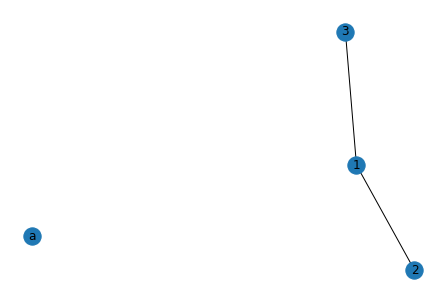

In [65]:
g.add_node('a')
print(nx.draw(g, with_labels=True))

In [66]:
print('노드 수:',g.number_of_nodes())
print('연결선 수:', g.number_of_edges())

노드 수: 4
연결선 수: 2


In [72]:
g.nodes

NodeView((1, 2, 3, 'a'))

In [73]:
g.edges

EdgeView([(1, 2), (1, 3)])

In [74]:
g.degree

DegreeView({1: 2, 2: 1, 3: 1, 'a': 0})

In [71]:
# 인접
g.adj

AdjacencyView({1: {2: {}, 3: {}}, 2: {1: {}}, 3: {1: {}}, 'a': {}})

In [77]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 2
Average degree:   1.0000


#### directed graph

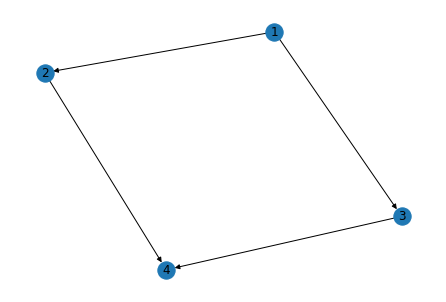

In [80]:
g2 = nx.DiGraph()

g2.add_edges_from([(1,2),(1,3),(2,4),(3,4)])

nx.draw(g2, with_labels=True, font_weigth='bold')

In [82]:
g2.degree

DiDegreeView({1: 2, 2: 2, 3: 2, 4: 2})

In [83]:
g2.in_degree

InDegreeView({1: 0, 2: 1, 3: 1, 4: 2})

In [84]:
g2.out_degree

OutDegreeView({1: 2, 2: 1, 3: 1, 4: 0})

#### 가중치 표시

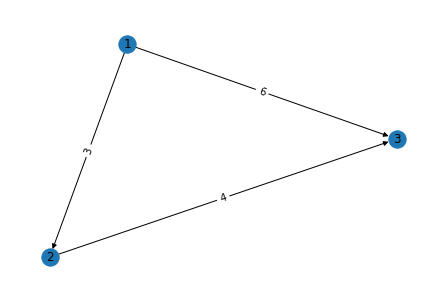

In [86]:
g3 = nx.DiGraph()

g3.add_weighted_edges_from([(1,2,3),(2,3,4)])
g3.add_edge(1,3, weight=6)

nx.draw(g3, pos = pos, with_labels=True)

labels = nx.get_edge_attributes(g3, 'weight')
nx.draw_networkx_edge_labels(g3, pos, edge_labels=labels);

Any NetworkX graph behaves like a Python dictionary with nodes as primary keys

In [22]:
g = nx.Graph()
g.add_edge(1,2, weight=4.0) # 가중치 4만큼!
g[1][2]['weight'] = 5.0 # 가중치 5로 change
g[1][2]

{'weight': 5.0}

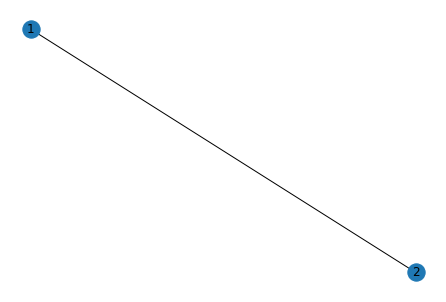

In [23]:
nx.draw(g, with_labels=True)

#### node and edge iterators

Many applications require iteration over nodes or over edges: simple and easy in NetworkX

In [24]:
g = nx.Graph()
g.add_edge(1,2)
for node in g.nodes(): 
    print(node, g.degree(node))

1 1
2 1


In [25]:
g.add_edge(1,3, weight=2.5)
g[1][2]['weight'] = 1.5
for n1, n2, attr in g.edges(data=True): 
    print(n1, n2, attr['weight'])

1 2 1.5
1 3 2.5


### 3. Drawing graphs
#### Layout of a graph

![layouts](https://frhyme.github.io/assets/images/markdown_img/180807_nx_layout_comp.svg)

In [26]:
g = nx.Graph()

In [27]:
g.add_edge(1,2)
g.add_edge(2,3)
g.add_edge(3,4)
g.add_edge(4,5)
g.add_edge(6,7)
g.add_edge(1,4)
g.add_edge(1,5)
g.add_edge(2,4)
g.add_edge(4,7)
g.add_edge(4,8)

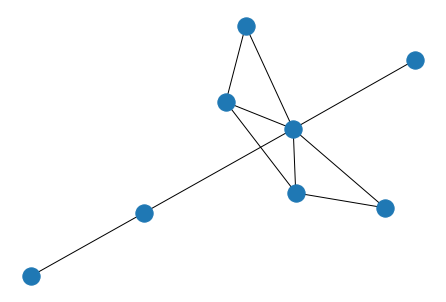

In [28]:
nx.draw(g)

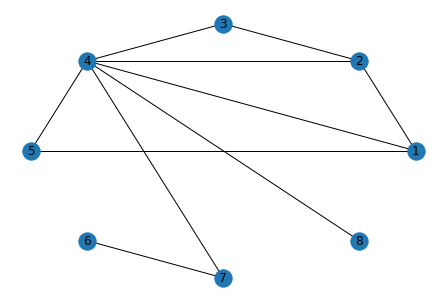

In [29]:
# a circular layout 
nx.draw_circular(g, with_labels = True)

In [30]:
# clearing the current plot 깨끗하게 지우기! 
plt.clf()

<Figure size 432x288 with 0 Axes>

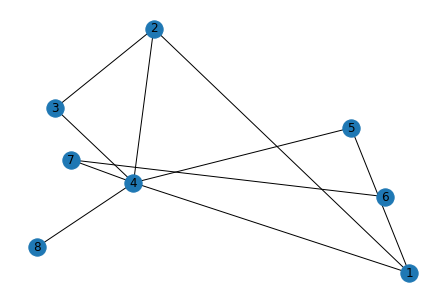

In [31]:
# Draw the graph G with a random layout.
nx.draw_random(g,with_labels=True)

In [32]:
plt.clf()

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.7/site-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


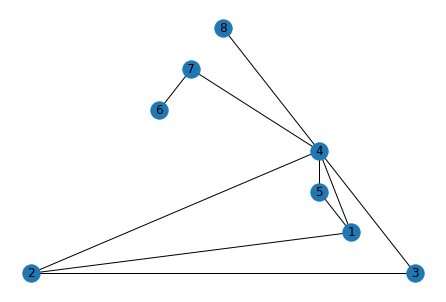

In [33]:
# planar layout 
nx.draw_planar(g, with_labels = True)

In [34]:
plt.clf()

<Figure size 432x288 with 0 Axes>

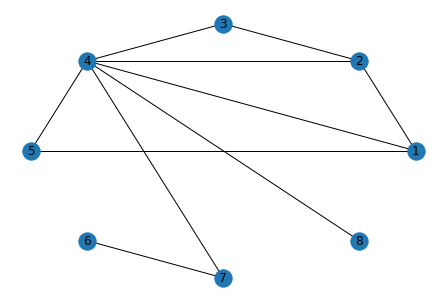

In [35]:
# shell layout 
nx.draw_shell(g, with_labels = True)

In [36]:
plt.clf()

<Figure size 432x288 with 0 Axes>

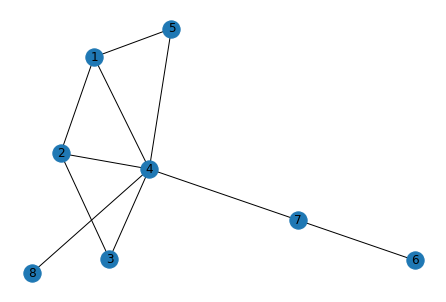

In [37]:
# spring layout 
nx.draw_spring(g, with_labels=True)

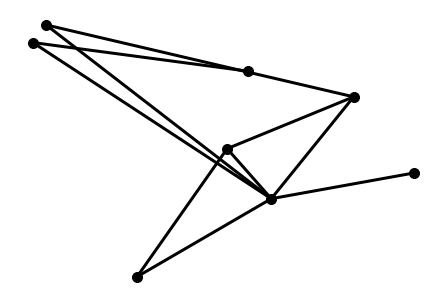

In [38]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width':3
}
nx.draw_random(g, **options)

#### Using the pre-built graph

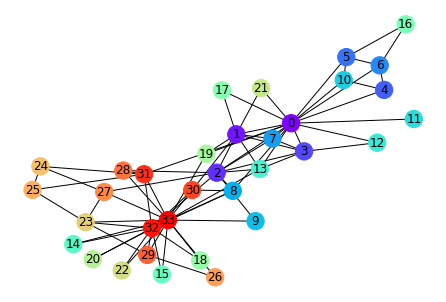

In [39]:
# Load the graph - 내장된 노드 데이터 
g = nx.karate_club_graph()
# Find key-values for the graph
pos = nx.spring_layout(g)
# Plot the graph
nx.draw(g, node_color=range(34), node_size=300, 
        cmap=plt.get_cmap('rainbow'),
        with_labels=True, pos=pos)

In [40]:
# 얼마만큼 연결되어 있는지 알려주는 지표 
g.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [41]:
# Isolate the sequence of degrees - 따로 떨어뜨려주기
degree_sequence = list(g.degree())
degree_sequence[:5]

[(0, 16), (1, 9), (2, 10), (3, 6), (4, 3)]

In [42]:
# 노드 수
nb_nodes = 34
# 연결선 수
nb_arr = len(g.edges())
# np.array로 바꾸어줘야 넘파이 연산 가능, 오른쪽 기준 계산
avg_degree = np.mean(np.array(degree_sequence)[:,1])
med_degree = np.median(np.array(degree_sequence)[:,1])
max_degree = max(np.array(degree_sequence)[:,1])
min_degree = np.min(np.array(degree_sequence)[:,1])

In [43]:
print("Number of nodes : " + str(nb_nodes))
print("Number of edges : " + str(nb_arr))
print("Maximum degree : " + str(max_degree))
print("Minimum degree : " + str(min_degree))
print("Average degree : " + str(avg_degree))
print("Median degree : " + str(med_degree))

Number of nodes : 34
Number of edges : 78
Maximum degree : 17
Minimum degree : 1
Average degree : 4.588235294117647
Median degree : 3.0


### 4. Case study with Facebook data

csv 파일을 코드로 열기 전에 직접 파일을 열어 어떻게 데이터가 구성되어 있는지 확인해보세요. 저런 방식으로 데이터들을 만들 수 있습니다.

In [44]:
import pandas as pd

In [45]:
df = pd.read_csv('facebook_combined.txt')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88233 entries, 0 to 88232
Data columns (total 1 columns):
0 1    88233 non-null object
dtypes: object(1)
memory usage: 689.4+ KB


In [47]:
df.head()

0 1
0  0 2
1  0 3
2  0 4
3  0 5
4  0 6

In [48]:
g = nx.read_edgelist('facebook_combined.txt', 
                     create_using=nx.Graph(),
                    nodetype=int)

In [49]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


데이터가 커서 시간이 많이 걸려요ㅎㅎ 제 컴퓨터로 2-3분 소요됩니다!

In [ ]:
plt.figure(figsize=(20,20))
nx.draw_networkx(g)

이 데이터에서 중심부를 찾아볼게요. 중심부를 찾는 방법에는 여러가지가 있지만 이 중에서 betweenness centrality를 사용해볼 겁니다.

- betweenness centrality를 사용: [네트워크의 모든 노드 쌍 간의 shortest path가 해당 노드를 지나는지 고려한 centrality](https://frhyme.github.io/python-lib/network-centrality/)
- [normalized / endpoints 설명](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html)
- 이것 또한 시간이 오~래 걸려요!

In [ ]:
pos = nx.spring_layout(g)
betCent = nx.betweenness_centrality(g, normalized=True, 
                                   endpoints=True)
node_color = [2000.0 * g.degree(v) for v in g]
node_size = [v * 10000 for v in betCent.values()]

plt.figure(figsize=(20,20))
nx.draw_networkx(g, pos=pos, with_labels=False,
                node_color=node_color,
                node_size=node_size)
plt.axis('off')